True

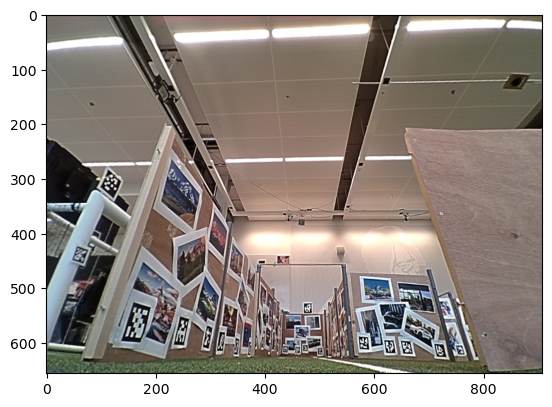

In [9]:
from turtle import undo
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from pathlib import Path
# Get the file paths for all images in the local directory
images = sorted(Path('/home/student/ros_env/image_capture/rae_right_image_raw_2024-12-05_12-20/frames').rglob('*.jpg'))

def undistort(img, mtx, dist):
    # Get the shape of the image
    h, w = img.shape[:2]
    # Generate the new camera matrix
    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 0.5, (w,h))
    # Undistort the image
    dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
    # Crop the image
    x, y, w, h = roi
    dst = dst[y:y+h, x:x+w]
    return dst

# Load the camera matrix and distortion coefficients
mtx = np.loadtxt("mtx")
dist = np.loadtxt("dist")

image = cv2.imread(str(images[0]))
undistorted = undistort(image, mtx, dist)
plt.imshow(undistorted[..., ::-1])    
cv2.imwrite(images[0].with_suffix('.undistorted.jpg').as_posix(), undistorted)


In [11]:
for image_path in images:
    image = cv2.imread(image_path.as_posix())
    undistorted = undistort(image, mtx, dist)
    cv2.imwrite(image_path.with_suffix('.undistorted.jpg').as_posix(), undistorted)


In [ ]:
import zipfile

with zipfile.ZipFile('undistorted_images.zip', 'w') as archive:
    for image_path in images:
        archive.write(image_path.with_suffix('.undistorted.jpg').as_posix(), image_path.name)
        
print("Images saved to undistorted_images.zip")

Images saved to undistorted_images.zip


: 